**Instructor**: Prof. Peter Beerel (pabeerel@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu)

# Overfitting and Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
def create_random_data(func, sample_size, std):
  x = np.linspace(0,1,sample_size).reshape(-1,1)
  y = func(x) + np.random.normal(scale = std, size = x.shape)
  return x, y

In [3]:
def func(x):
  return np.cos(2*np.pi*x)

In [4]:
sample_size = 10
sigma = 0.3

In [5]:
np.random.seed(17)
x_train, y_train = create_random_data(func, sample_size, sigma)
x_true = np.linspace(0,1,100).reshape(-1,1)
y_true = func(x_true)

x_validation, y_validation = create_random_data(func, 30, sigma)

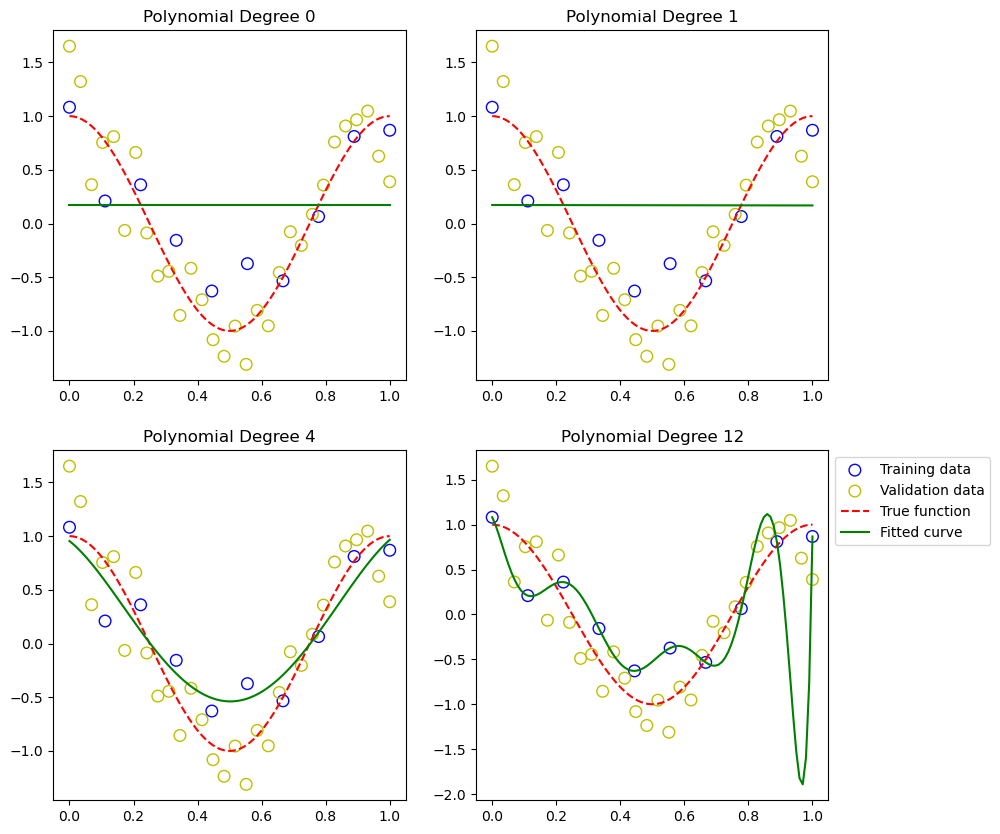

In [6]:
fig, axes = plt.subplots(2,2, figsize = (10, 10))
axs = axes.flatten()

polynomial_degrees = [0, 1, 4, 12]
for i, degree in enumerate(polynomial_degrees):
  ax = axs[i]
  feature_transformation = PolynomialFeatures(degree=degree)
  X_train_transformed = feature_transformation.fit_transform(x_train)
  X_true_transformed = feature_transformation.fit_transform(x_true)
  # X_val_transformed = feature_transformation.fit_transform(x_validation)

  model = LinearRegression()
  model.fit(X_train_transformed, y_train)
  y_prediction_true = model.predict(X_true_transformed)

  ax.scatter(x_train, y_train, facecolor = "none", edgecolor='b', s=70, label = "Training data")
  ax.scatter(x_validation, y_validation, facecolor = "none", edgecolor='y', s=70, label = "Validation data")
  ax.plot(x_true, y_true, c = 'r', linestyle='--', label = "True function")
  ax.plot(x_true, y_prediction_true, c = 'g', label = "Fitted curve")
  ax.set_title(f"Polynomial Degree {degree}")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


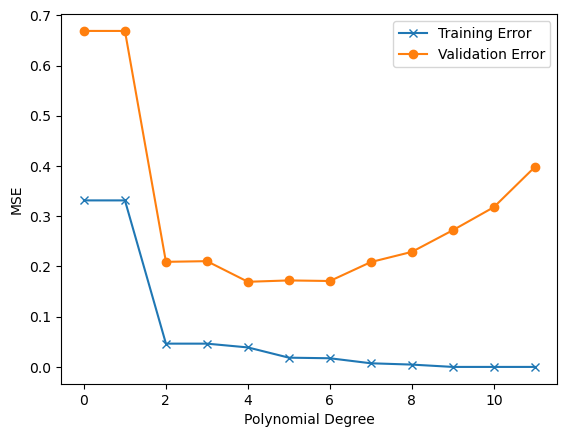

In [7]:
training_errors = []
validation_errors = []

for degree in range(12):
  feature_transformation = PolynomialFeatures(degree = degree)
  X_train_transformed = feature_transformation.fit_transform(x_train)
  X_validation_transformed = feature_transformation.fit_transform(x_validation)

  model = LinearRegression()
  model.fit(X_train_transformed, y_train)

  training_errors.append(np.mean(np.square(y_train - model.predict(X_train_transformed))))
  validation_errors.append(np.mean(np.square(y_validation - model.predict(X_validation_transformed))))

plt.plot(training_errors, 'x-', label = 'Training Error')
plt.plot(validation_errors, 'o-', label = 'Validation Error')
plt.legend()
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.show()


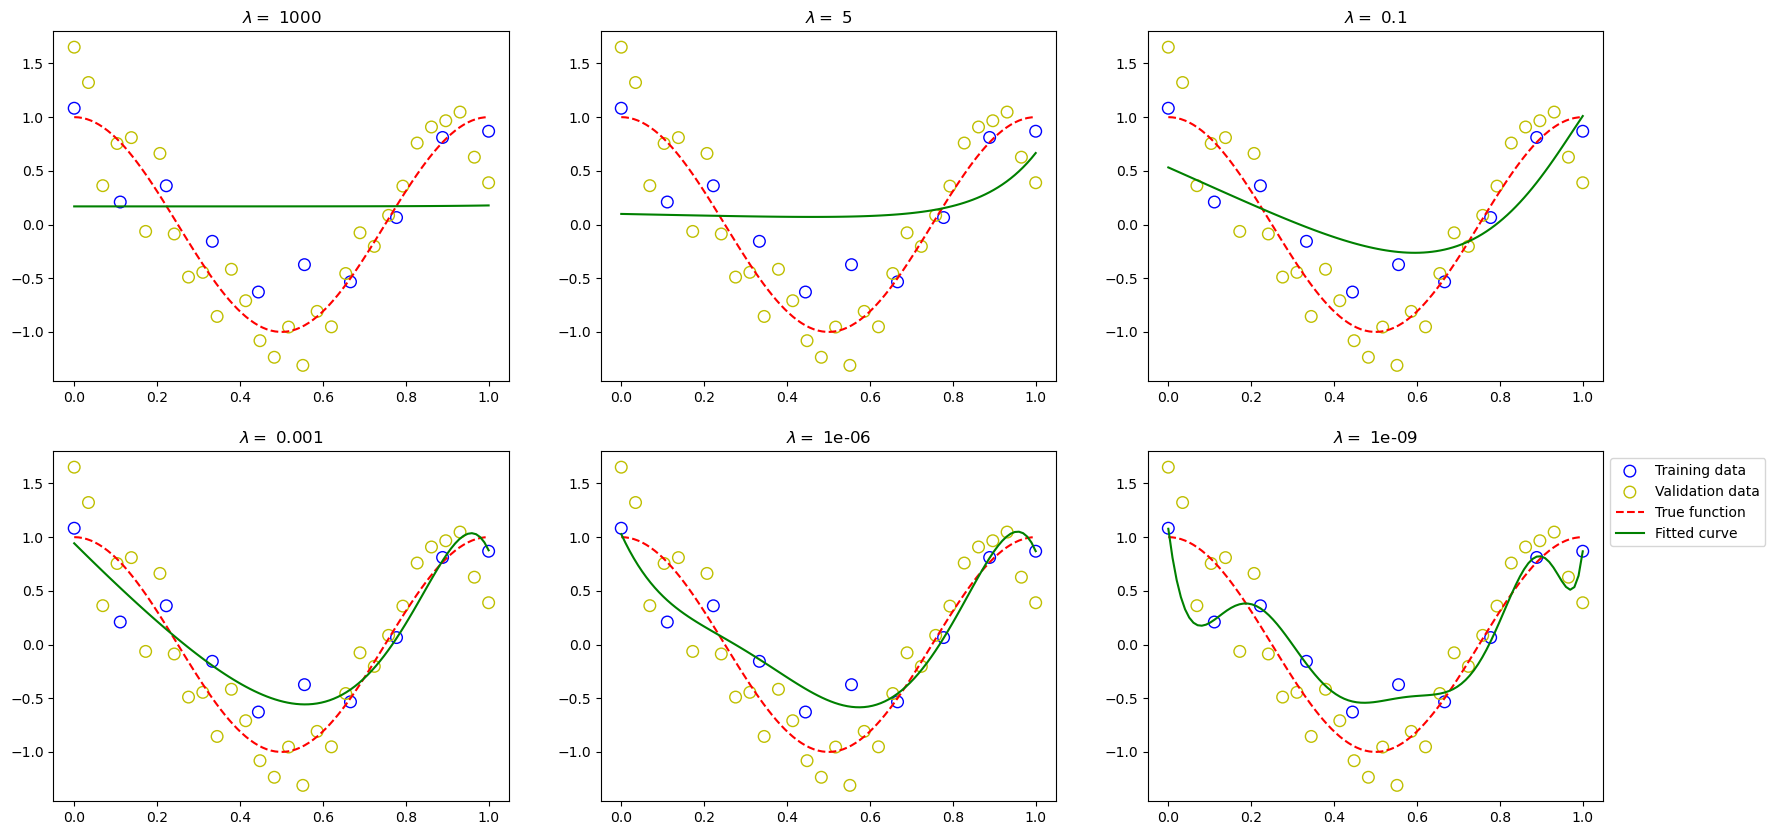

In [8]:
fig, axes = plt.subplots(2,3, figsize = (20, 10))
axs = axes.flatten()

selected_degree = 12
regularization_list = [1000, 5, 0.1, 1e-3, 1e-6, 1e-9]
for i, regularization_parameter in enumerate(regularization_list):
  ax = axs[i]
  feature_transformation = PolynomialFeatures(degree=selected_degree)
  X_train_transformed = feature_transformation.fit_transform(x_train)
  X_true_transformed = feature_transformation.fit_transform(x_true)
  # X_val_transformed = feature_transformation.fit_transform(x_validation)

  model = Ridge(alpha=regularization_parameter)
  model.fit(X_train_transformed, y_train)
  y_prediction_true = model.predict(X_true_transformed)

  ax.scatter(x_train, y_train, facecolor = "none", edgecolor='b', s=70, label = "Training data")
  ax.scatter(x_validation, y_validation, facecolor = "none", edgecolor='y', s=70, label = "Validation data")
  ax.plot(x_true, y_true, c = 'r', linestyle='--', label = "True function")
  ax.plot(x_true, y_prediction_true, c = 'g', label = "Fitted curve")
  ax.set_title(fr"$\lambda = $ {regularization_parameter}")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
